# <center>ĐỒ ÁN CUỐI KỲ: KHOA HỌC DỮ LIỆU ỨNG DỤNG</center>

### <center>**Đề tài:** Dự đoán kết quả học tập của học sinh dựa trên việc chơi game</center>

**Nhóm:** Bumblebee - Nhóm 2

**Thành viên**

| MSSV     | Họ và tên       | Github                      |
|----------|-----------------|-----------------------------|
| 19120511 | Võ Văn Hiếu     | https://github.com/vv-hieu  |
| 19120526 | Huỳnh Đức Huy   | https://github.com/KaiKush  |
| 19120539 | Vương Thế Khang | https://github.com/vt-khang |


**Github repository:** https://github.com/vt-khang/KHDLUD-FinalProject

## Import

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set option
pd.set_option('display.max_colwidth', 999)
pd.set_option('float_format', '{:f}'.format)

## A. THU THẬP DỮ LIỆU

### Mục tiêu đề tài

Cuộc thi này nhằm mục đích xác định những cách giúp học sinh tham gia vào nội dung giáo dục bằng hinh thức trò chơi giáo dục, từ đó đưa ra các dự đoán hiệu suất học tập của học sinh. Trong đồ án này sử dụng trò chơi giáo dục trực tuyến [Jo Wilder](https://pbswisconsineducation.org/jowilder/play-the-game) để theo dõi quá trình học tập của học sinh từ lớp 3-5, chủ yếu về các chủ đề lịch sử. Dưới đây là một số yếu tố cốt lõi của trò chơi:
- Nhân vật: Trong trò chơi này, bạn phải tương tác với nhân vật chính (nhân vật người chơi) cùng với các nhân vật khác nhau và ghé thăm nhiều địa điểm khác nhau trên bản đồ để tìm ra manh mối, từ đó giải đáp những bí ẩn liên quan đến lịch sử Wisconsin.
- Điều khiển: Để di chuyển qua các khung cảnh khác nhau, bạn phải sử dụng chuột để click vào nơi bạn muốn di chuyển, điều này cũng tương tự đối với tương tác với các nhân vật (đọc tài liệu, di chuyển, trò chuyện, ...).
- Notebook: Đây là nơi cung cấp thông tin và lưu những phát hiện của từng manh mối bạn có được trong trò chơi.
- Thời gian: Là thời gian bạn dành cho mỗi địa điểm khác nhau tùy thuộc vào cách bạn theo dõi câu chuyện của trò chơi.

### Giới thiệu bộ dữ liệu

Bộ dữ liệu của cuộc thi là dữ liệu về chuỗi thời gian được ghi lại từ trò chơi giáo dục trực tuyến [Jo Wilder](https://pbswisconsineducation.org/jowilder/play-the-game). Trò chơi được chia thành 4 chương, sau mỗi chương người chơi sẽ được trả lời một số câu hỏi. Có tổng cộng 18 câu hỏi liên quan trực tiếp trong trò chơi. Mục tiêu của cuộc thi là sử dụng bộ dữ liệu từ những câu hỏi trên để xác định xem người chơi có trả lời đúng câu hỏi hay không, từ đó có thể đưa ra các kết luận về hiệu suất học tập của học sinh.

Các file dữ liệu này bao gồm:
- **train.csv** - tập train
- **test.csv** - tập test
- **sample_submission.csv** - định dạng file dùng để nộp trên Kaggle
- **train_labels.csv** - câu trả lời cho 18 câu hỏi của mỗi session trong tập train

Cuộc thi: [Predict Student Performance from Game Play](https://www.kaggle.com/competitions/predict-student-performance-from-game-play) \
Nhà tổ chức cuộc thi: [Field Day Lab](https://fielddaylab.wisc.edu) \
Nhà tài trợ: [The Learning Agency Lab](https://www.the-learning-agency-lab.com) \
License: OPEN SOURCE - MIT

### Ứng dụng và ý nghĩa

- Thúc đẩy nghiên cứu về các phương pháp giáo dục, dạy học, tiếp thu kiến thức, ... từ các trò chơi giáo dục.
- Hỗ trợ các nhà phát triển phần mềm trò chơi (Game Developer) để tạo ra thêm nhiều trải nghiệm học tập có hiệu quả hơn cho học sinh.
- Thấy được các lợi ích rộng rãi của các nền tảng học tập dựa trên trò chơi đến với nhiều người hơn.

## B. KHÁM PHÁ DỮ LIỆU

Đầu tiên, ta sẽ xem thử từng tập dữ liệu trông như thế nào.
- Đọc dữ liệu từ file "train.csv" và lưu vào dataframe `raw_train_df`.
- Đọc dữ liệu từ file "test.csv" và lưu vào dataframe `raw_test_df`.
- Đọc dữ liệu từ file "train_labels.csv" và lưu vào dataframe `raw_train_labels_df`.

In [2]:
raw_train_df = pd.read_csv('data/train.csv')
raw_train_df.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.000000,494.000000,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.000000,494.000000,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.000000,494.000000,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.000000,494.000000,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.000000,494.000000,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4


In [3]:
raw_test_df = pd.read_csv('data/test.csv')
raw_test_df.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,session_level
0,20090109393214576,0,0,cutscene_click,basic,0,NaN,-413.991405,75.685314,380.000000,...,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,0
1,20090109393214576,1,1965,person_click,basic,0,NaN,-105.991405,-63.314686,688.000000,...,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4,0
2,20090109393214576,2,3614,person_click,basic,0,NaN,-418.991405,47.685314,375.000000,...,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4,0
3,20090109393214576,3,5330,person_click,basic,0,NaN,-110.991405,-57.314686,683.000000,...,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4,0
4,20090109393214576,4,6397,person_click,basic,0,NaN,-110.991405,-57.314686,683.000000,...,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4,0


In [4]:
raw_train_labels_df = pd.read_csv('data/train_labels.csv')
raw_train_labels_df.head()

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090312455206810_q1,1
3,20090313091715820_q1,0
4,20090313571836404_q1,1


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

Ta sẽ xem thử số dòng và số cột của từng tập dữ liệu trên.

In [5]:
def num_rows_and_cols(df, title):
  num_rows, num_cols = df.shape
  print(f'    {title}\n\t- Số dòng: {num_rows}\n\t- Số cột:  {num_cols}')

num_rows_and_cols(raw_train_df, 'Tập dữ liệu train')
num_rows_and_cols(raw_test_df, 'Tập dữ liệu test')
num_rows_and_cols(raw_train_labels_df, 'Tập dữ liệu train_labels')

    Tập dữ liệu train
	- Số dòng: 26296946
	- Số cột:  20
    Tập dữ liệu test
	- Số dòng: 3728
	- Số cột:  21
    Tập dữ liệu train_labels
	- Số dòng: 424116
	- Số cột:  2


Ta thấy được:
- Dữ liệu của tập train có kích thước **26,296,946 dòng x 20 cột**.
- Dữ liệu của tập test có kích thước **3,728 dòng x 21 cột**.
- Dữ liệu của tập train_labels có kích thước **424,116 x 2 cột**.

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Quan sát sơ các tập dữ liệu trên, ta thấy:
- Mỗi dòng của tập train và tập test chứa thông tin về một sự kiện trong từng index của một session trong trò chơi.
- Mỗi dòng của tập train_labels là câu trả lời cho từng câu hỏi của một session trong trò chơi.

Có vẻ như không có vấn đề các dòng có ý nghĩa khác nhau.

### Dữ liệu có các dòng bị lặp không?

Kiểm tra xem dữ liệu có các dòng bị lặp không và lưu kết quả vào biến `have_duplicated_row`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược lại.

In [6]:
def have_duplicated_dataset(df, title):
  have_duplicated_row = any(df.duplicated())
  print(f'    {title}:\n\t   {have_duplicated_row}')

have_duplicated_dataset(raw_train_df, 'Tập dữ liệu train')
have_duplicated_dataset(raw_test_df, 'Tập dữ liệu test')
have_duplicated_dataset(raw_train_labels_df, 'Tập dữ liệu train_labels')

    Tập dữ liệu train:
	   False
    Tập dữ liệu test:
	   False
    Tập dữ liệu train_labels:
	   False


Như vậy, không có dòng nào bị lặp lại ở các tập dữ liệu trên.

### Mỗi cột có ý nghĩa gì?

Mỗi cột của tập dữ liệu `raw_train_df` có ý nghĩa như sau:
-	**session_id** – id của session sự kiện xảy ra
-	**index** – index của các sự kiện trong session, dùng để phân biệt trong cùng một session
-	**elapsed_time** – khoảng thời gian đã trôi qua (tính bằng ms) giữa thời điểm bắt đầu session cho đến khi sự kiện được ghi lại
-	**event_name** – tên của loại sự kiện
-	**name** – tên sự kiện (ví dụ: xác định xem sự kiện `notebook_click` là đang mở hay đóng cuốn sổ ghi chép)
-	**level** – sự kiện xảy ra ở level nào của trò chơi (từ 0 đến 22)
-	**page** – số trang của sự kiện (chỉ dành cho các sự kiện có liên quan đến notebook)
-	**room_coor_x** – tọa độ x của lần click vào room trong trò chơi (chỉ dành cho các sự kiện click)
-	**room_coor_y** – tọa độ y của lần click vào room trong trò chơi (chỉ dành cho các sự kiện click)
-	**screen_coor_x** – tọa độ x của lần click liên quan đến màn hình của người chơi (chỉ dành cho các sự kiện click)
-	**screen_coor_y** – tọa độ y của lần click liên quan đến màn hình của người chơi (chỉ dành cho các sự kiện click)
-	**hover_duration** – thời lượng hover (tính bằng ms) xảy ra trong bao lâu (chỉ dành cho các sự kiện hover)
-	**text** – văn bản mà người chơi nhìn thấy trong sự kiện này
-	**fqid** – id đầy đủ của sự kiện
-	**room_fqid** – id đầy đủ của room mà sự kiện xảy ra
-	**text_fqid** – id đầy đủ của văn bản
-	**fullscreen** – trò chơi có được mở chế độ toàn màn hình không
-	**hq** – trò chơi có bật chất lượng cao hay không
-	**music** – có bật hay tắt nhạc trong trò chơi không
-	**level_group** – nhóm level và nhóm các câu hỏi (0-4, 5-12, 13-22)

Các cột của tập dữ liệu `raw_test_df` giống với tập dữ liệu train, ngoài ra có thêm 1 cột sau:
- **session_level** - level của session sự kiện (0, 1, 2)

Mỗi cột của tập dữ liệu `raw_train_labels_df` có ý nghĩa như sau:
- **session_id** – id của session sự kiện xảy ra
- **correct** - câu trả lời cho từng câu hỏi của một session

Ta sẽ tập trung vào phần khám phá dữ liệu của tập dữ liệu train.

### Mỗi cột hiện đang có kiểu dữ liệu gì?

Xem thử kiểu dữ liệu của các cột dữ liệu.

In [7]:
raw_train_df.dtypes

session_id          int64
index               int64
elapsed_time        int64
event_name         object
name               object
level               int64
page              float64
room_coor_x       float64
room_coor_y       float64
screen_coor_x     float64
screen_coor_y     float64
hover_duration    float64
text               object
fqid               object
room_fqid          object
text_fqid          object
fullscreen          int64
hq                  int64
music               int64
level_group        object
dtype: object

Như vậy có thể thấy có một số cột đang có kiểu dữ liệu `object` như "event_name", "name", "text", "fqid", "room_fqid", "text_fqid", "level_group". Ta sẽ sử dụng phương pháp tìm số lượng giá trị phân biệt của từng cột và chọn lọc những cột có ít giá trị phân biệt nhất để đưa các cột này về kiểu dữ liệu dạng phân loại `category`.

Với mỗi cột đang có kiểu dữ liệu là `object`. Ta sẽ tính số lượng các giá trị khác nhau (không xét giá trị NaN) và lưu vào dataframe `object_col_df`. Sau đó sắp xếp theo thứ tự giảm dần số lượng các giá trị khác nhau "nunique".

In [12]:
def nunique(s):
  return s.nunique()

object_cols = raw_train_df.select_dtypes(include = 'object').columns
object_col_df = raw_train_df[object_cols].agg([nunique]).T.sort_values('nunique', ascending = False)
object_col_df

,nunique
text,597
fqid,128
text_fqid,126
room_fqid,19
event_name,11
name,6
level_group,3


Từ bảng thống kê trên, ta thấy các cột "event_name", "name", "level_group" nên đổi thành các cột thuộc dạng phân loại (categorical).

Thay đổi kiểu dữ liệu của các cột "event_name", "name", "level_group" sang kiểu dữ liệu dạng `category`.

In [18]:
raw_train_df[['event_name', 'name', 'level_group']] = raw_train_df[['event_name', 'name', 'level_group']].astype('category')

Tương tự như trên, như vậy có thể thấy có một số cột đang có kiểu dữ liệu dạng số `number` như "session_id", "index", "elapsed_time", "level", "page", "room_coor_x", "room_coor_y", "screen_coor_x", "screen_coor_y", "hover_duration", "fullscreen", "hq", "music". Ta sẽ sử dụng phương pháp tìm số lượng giá trị phân biệt của từng cột và chọn lọc những cột có ít giá trị phân biệt nhất để đưa các cột này về kiểu dữ liệu dạng phân loại `category`.

Với mỗi cột đang có kiểu dữ liệu dạng số như `int`, `float`. Ta sẽ tính số lượng các giá trị khác nhau (không xét giá trị NaN) và lưu vào dataframe `number_col_df`. Sau đó sắp xếp theo thứ tự giảm dần số lượng các giá trị khác nhau "nunique".

In [14]:
number_cols = raw_train_df.select_dtypes(include = 'number').columns
number_col_df = raw_train_df[number_cols].agg([nunique]).T.sort_values('nunique', ascending = False)
number_col_df

,nunique
room_coor_x,17438693
room_coor_y,13651023
elapsed_time,5042639
screen_coor_y,102591
screen_coor_x,57924
hover_duration,24101
session_id,23562
index,20348
level,23
page,7


Từ bảng thống kê bên trên, ta có thể thấy:
- Các cột "level", "fullscreen", "hq", "music" đang có kiểu dữ liệu `int`. Ta cần đưa các cột này về dạng `category`.
- Cột "page" đang có kiểu dữ liệu `float`. Ta cần đưa cột này về dạng `category` tương tự như trên.

Thay đổi kiểu dữ liệu của các cột "level", "fullscreen", "hq", "music" sang kiểu dữ liệu dạng `category`.

In [15]:
raw_train_df[['level', 'fullscreen', 'hq', 'music']] = raw_train_df[['level', 'fullscreen', 'hq', 'music']].astype('category')

Thay đổi kiểu dữ liệu của các cột "page" sang kiểu dữ liệu dạng `category`. Do kiểu dữ liệu của cột "page" đang là kiểu dữ liệu `float` nên ta sẽ đưa về kiểu dữ liệu `int` trước rồi mới đổi sang kiểu dữ liệu dạng `category`.

In [16]:
raw_train_df['page'] = raw_train_df['page'].astype('Int64').astype('category')

Xem lại kiểu dữ liệu của các cột dữ liệu sau khi tiền xử lý.

In [19]:
raw_train_df.dtypes

session_id           int64
index                int64
elapsed_time         int64
event_name        category
name              category
level             category
page              category
room_coor_x        float64
room_coor_y        float64
screen_coor_x      float64
screen_coor_y      float64
hover_duration     float64
text                object
fqid                object
room_fqid           object
text_fqid           object
fullscreen        category
hq                category
music             category
level_group       category
dtype: object

Có vẻ các cột đều có kiểu dữ liệu phù hợp. Nếu trong quá trình phân tích dữ liệu cần phải thay đổi kiểu dữ liệu của các cột thì ta sẽ quay lại tiền xử lý ở đây, tạm thời ta chấp nhận kiểu dữ liệu hiện tại của các cột.

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Với mỗi cột numerical, ta sẽ tính số lượng giá trị thiếu, tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị xuất hiện (count), giá trị nhỏ nhất (min), giá trị trung bình (mean), giá trị trung vị (median), giá trị lớn nhất (max), các khoảng tứ phân vị (Q1, Q2, Q3) và độ lệch chuẩn (std). Sau đó ta sẽ lưu các giá trị này vào dataframe `numerical_col_df` thành 11 dòng là "num_missing_val", "ratio_missing_val", "count", "min", "mean", "median", "max", "Q1", "Q2", "Q3", "std".

In [20]:
def num_missing_val(s):
  return s.isna().sum()
def ratio_missing_val(s):
  return s.isna().mean() * 100
def count(s):
  return s.count();
def Q1(s):
  return s.quantile(0.25)
def Q2(s):
  return s.quantile(0.5)
def Q3(s):
  return s.quantile(0.75)

numerical_cols = raw_train_df.select_dtypes(include = 'number').columns
numerical_col_df = raw_train_df[numerical_cols].agg([num_missing_val, ratio_missing_val, count, min, np.mean, np.median, max, Q1, Q2, Q3, np.std]).T
numerical_col_df[['num_missing_val', 'count']] = numerical_col_df[['num_missing_val', 'count']].astype(int)
numerical_col_df

,num_missing_val,ratio_missing_val,count,min,mean,median,max,Q1,Q2,Q3,std
session_id,0,0.000000,26296946,20090312431273200.000000,21132488308433916.000000,21040213470142500.000000,22100221145014656.000000,21010216570082376.000000,21040213470142500.000000,21100516321490164.000000,571295349122915.375000
index,0,0.000000,26296946,0.000000,644.510240,595.000000,20473.000000,288.000000,595.000000,896.000000,545.787957
elapsed_time,0,0.000000,26296946,0.000000,4016693.894748,1014801.000000,1988606704.000000,439700.000000,1014801.000000,1747040.000000,31270320.364611
room_coor_x,2073272,7.884079,24223674,-1992.354569,-54.905793,-11.162797,1261.773745,-352.839501,-11.162797,296.651499,520.292583
room_coor_y,2073272,7.884079,24223674,-918.162349,-116.211852,-97.605339,543.616424,-212.718256,-97.605339,22.687860,218.470954
screen_coor_x,2073272,7.884079,24223674,0.000000,458.409812,447.000000,1919.000000,269.000000,447.000000,663.000000,247.938892
screen_coor_y,2073272,7.884079,24223674,0.000000,385.586034,397.000000,1440.000000,304.000000,397.000000,471.000000,129.816557
hover_duration,24294702,92.386021,2002244,0.000000,3471.003377,419.000000,245163690.000000,99.000000,419.000000,1266.000000,460202.415493


Quan sát bảng thống kê mô tả của các cột có kiểu dữ liệu dạng số (numerical), ta thấy giá trị lớn nhất của 2 cột "screen_coor_x" và "screen_coor_y" là **1919** và **1440**. Điều này có nghĩa là kích thước màn hình trò chơi chỉ đạt tối đa **1919x1440**. Trong khi đó, ta thấy các giá trị của 2 cột "room_coor_x" và "room_coor_y" có xuất hiện giá trị âm. Ta sẽ làm rõ điều này ở bước trực quan hóa dữ liệu.

Ngoài ra, ta thấy có xuất hiện giá trị bị thiếu ở các cột "room_coor_x", "room_coor_y", "screen_coor_x", "screen_coor_y", "hover_duration", trong đó:
- Cột "hover_duration" có tỉ lệ giá trị bị thiếu nhiều nhất **(~92.39%)** so với các cột còn lại.
- Các cột "room_coor_x", "room_coor_y", "screen_coor_x", "screen_coor_y" đều có tỉ lệ giá trị bị thiếu là **7.88%**.
  
Ta sẽ xem thử phân bố các giá trị bị thiếu theo từng loại sự kiện dựa vào cột "event_name".

In [21]:
raw_train_df.groupby(['event_name']).agg(ratio_missing_val)[numerical_cols]

,session_id,index,elapsed_time,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration
event_name,,,,,,,,
checkpoint,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000
cutscene_click,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
map_click,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
map_hover,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000,100.000000,0.000000
navigate_click,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
notebook_click,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
notification_click,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
object_click,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
object_hover,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000,100.000000,0.000000


Như vậy có thể thấy:
- Các sự kiện liên quan tới hover (như "map_hover", "object_hover") và "checkpoint" thì các cột "room_coor_x", "room_coor_y", "screen_coor_x", "screen_coor_y" thường bị thiếu chung với nhau.
- Các sự kiện liên quan tới hover (như "map_hover", "object_hover") thì cột "hover_duration" không bao giờ bị thiếu giá trị.

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?


Với mỗi cột categorical, ta sẽ tính số lượng giá trị thiếu, tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị xuất hiện (count), giá trị xuất hiện nhiều nhất (mode), số lượng giá trị xuất hiện nhiều nhất (không xét giá trị NaN), số lượng các giá trị khác nhau (không xét giá trị NaN) và danh sách các giá trị khác nhau (không xét giá trị NaN). Sau đó ta sẽ lưu các giá trị này vào dataframe `categical_col_df` thành 6 dòng là "num_missing_val", "ratio_missing_val", "count", "top", "freq", "nunique", "unique".

In [22]:
def nunique(s):
  return s.nunique()
def unique(s):
  return s.dropna().astype('object').unique()
def top(s):
  return s.mode()[0]
def freq(s):
  return (s == s.mode()[0]).value_counts()[True]

categorical_cols = raw_train_df.select_dtypes(exclude = 'number').columns
categorical_col_df = raw_train_df[categorical_cols].agg([num_missing_val, ratio_missing_val, count, top, freq, nunique, unique]).T
categorical_col_df[['num_missing_val', 'count']] = categorical_col_df[['num_missing_val', 'count']].astype(int)
categorical_col_df

,num_missing_val,ratio_missing_val,count,top,freq,nunique,unique
event_name,0,0.000000,26296946,navigate_click,11326433,11,"[cutscene_click, person_click, navigate_click, observation_click, notification_click, object_click, object_hover, map_hover, map_click, checkpoint, notebook_click]"
name,0,0.000000,26296946,undefined,12705785,6,"[basic, undefined, close, open, prev, next]"
level,0,0.000000,26296946,18,3499163,23,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]"
page,25732402,97.853196,564544,5,101171,7,"[0, 1, 3, 4, 5, 6, 2]"
text,16679807,63.428685,9617139,undefined,355969,597,"[undefined, Whatcha doing over there, Jo?, Just talking to Teddy., I gotta run to my meeting!, Can I come, Gramps?, Sure thing, Jo. Grab your notebook and come upstairs!, See you later, Teddy., I get to go to Gramps's meeting!, Now where did I put my notebook?, \u00f0\u0178\u02dc\u00b4, I love these photos of me and Teddy!, Found it!, Gramps is in trouble for losing papers?, This can't be right!, Gramps is a great historian!, Hmm. Button's still not working., Let's get started. The Wisconsin Wonders exhibit opens tomorrow!, Who wants to investigate the shirt artifact?, Not Leopold here. He's been losing papers lately., Hey!, It's true, they do keep going missing lately., See?, Besides, I already figured out the shirt., It's a women's basketball jersey!, That settles it., Wells, finish up your report., Leopold, why don't you help me set up in the Capitol?, We need to talk about that missing paperwork., Will do, Boss., Hey Jo, let's take a look at the shirt!, Your grampa is waiting ..."
fqid,8274415,31.465308,18022531,worker,1878958,128,"[intro, gramps, teddy, photo, notebook, retirement_letter, tobasement, janitor, toentry, groupconvo, report, boss, wells, directory, tocollection, cs, tunic, tunic.hub.slip, tostacks, outtolunch, tocloset, tomap, tunic.historicalsociety, tunic.kohlcenter, plaque, plaque.face.date, togrampa, tunic.capitol_0, chap1_finale, chap1_finale_c, tocloset_dirty, what_happened, trigger_scarf, trigger_coffee, tunic.capitol_1, tofrontdesk, archivist, magnify, tunic.humanecology, worker, businesscards, businesscards.card_0.next, businesscards.card_1.next, businesscards.card_bingo.next, businesscards.card_bingo.bingo, tohallway, tunic.drycleaner, logbook, logbook.page.bingo, tunic.library, tomicrofiche, reader, reader.paper0.next, reader.paper1.next, reader.paper2.bingo, wellsbadge, journals, journals.hub.topics, journals.pic_0.next, journals.pic_1.next, journals.pic_2.bingo, chap2_finale_c, ch3start, seescratches, tocage, glasses, directory.closeup.archivist, key, unlockdoor, confrontation, sav..."
room_fqid,0,0.000000,26296946,tunic.historicalsociety.entry,3622003,19,"[tunic.historicalsociety.closet, tunic.historicalsociety.basement, tunic.historicalsociety.entry, tunic.historicalsociety.collection, tunic.historicalsociety.stacks, tunic.kohlcenter.halloffame, tunic.capitol_0.hall, tunic.historicalsociety.closet_dirty, tunic.historicalsociety.frontdesk, tunic.humanecology.frontdesk, tunic.drycleaner.frontdesk, tunic.library.frontdesk, tunic.library.microfiche, tunic.capitol_1.hall, tunic.historicalsociety.cage, tunic.historicalsociety.collection_flag, tunic.wildlife.center, tunic.flaghouse.entry, tunic.capitol_2.hall]"
text_fqid,16679702,63.428286,9617244,tunic.historicalsociety.cage.confrontation,666557,126,"[tunic.historicalsociety.closet.intro, tunic.historicalsociety.closet.gramps.intro_0_cs_0, tunic.historicalsociety.closet.teddy.intro_0_cs_0, tunic.historicalsociety.closet.teddy.intro_0_cs_5, tunic.historicalsociety.closet.photo, tunic.historicalsociety.closet.notebook, tunic.historicalsociety.closet.retirement_letter.hub, tunic.historicalsociety.basement.janitor, tunic.historicalsociety.entry.groupconvo, tunic.historicalsociety.entry.boss.talktogramps, tunic.historicalsociety.entry.wells.talktogramps, tunic.historicalsociety.collection.cs, tunic.historicalsociety.collection.tunic.slip, tu

Ta thấy có xuất hiện giá trị bị thiếu ở các cột "page", "text", "fqid", "text_fqid", trong đó:
- Cột "page" có tỉ lệ giá trị bị thiếu nhiều nhất **(~97.86%)** so với các cột còn lại.
- Các cột "text" và "text_fqid" đều có tỉ lệ giá trị bị thiếu là **63.43%**.
- Cột "fqid" có tỉ lệ giá trị bị thiếu ít nhất **(~31.47%)** so với các cột còn lại.
  
Ta sẽ xem thử giá trị bị thiếu ở từng loại sự kiện dựa vào cột "event_name".

In [23]:
raw_train_df.groupby(['event_name']).agg(ratio_missing_val)[categorical_cols.drop(['event_name'])]

,name,level,page,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
event_name,,,,,,,,,,,
checkpoint,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
cutscene_click,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
map_click,0.000000,0.000000,100.000000,100.000000,14.443916,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
map_hover,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
navigate_click,0.000000,0.000000,100.000000,100.000000,61.680142,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
notebook_click,0.000000,0.000000,0.000000,100.000000,100.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
notification_click,0.000000,0.000000,100.000000,0.010169,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
object_click,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
object_hover,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000


Như vậy có thể thấy:
- Sự kiện liên quan tới notebook (như "notebook_click") thì cột "page" không bao giờ bị thiếu giá trị.
- Các sự kiện như "cutscene_click", "notification_click", "observation_click", "person_click" thì các cột "text" và "text_fqid" thường bị thiếu chung với nhau.

## C. TRỰC QUAN HÓA DỮ LIỆU

### Biểu diễn sự phân bố của dữ liệu

Để làm rõ điều này, ta sẽ dùng các biểu đồ boxplot đối với các cột dạng số để thể hiện sự phân bố của dữ liệu. Trong đó:
- Các cạnh bên trái và bên phải của hình hộp tương ứng với khoảng tứ phân vị thứ nhất (Q1) và khoảng tứ phân vị thứ ba (Q3).
- Đường ở giữa hình hộp tương ứng với khoảng tứ phân vị thứ hai (Q2), hay còn gọi là giá trị trung bình (mean).
- Các giá trị ngoài đường giới hạn cận bên trái sẽ có giá trị nhỏ hơn Q1 - 1.5*IQR.
- Các giá trị ngoài đường giới hạn cận bên phải sẽ có giá trị lớn hơn Q3 + 1.5*IQR.
- Các chấm còn lại nằm ở bên ngoài cận bên trái và cận bên phải là các outlier xuất hiện trong tập dữ liệu.

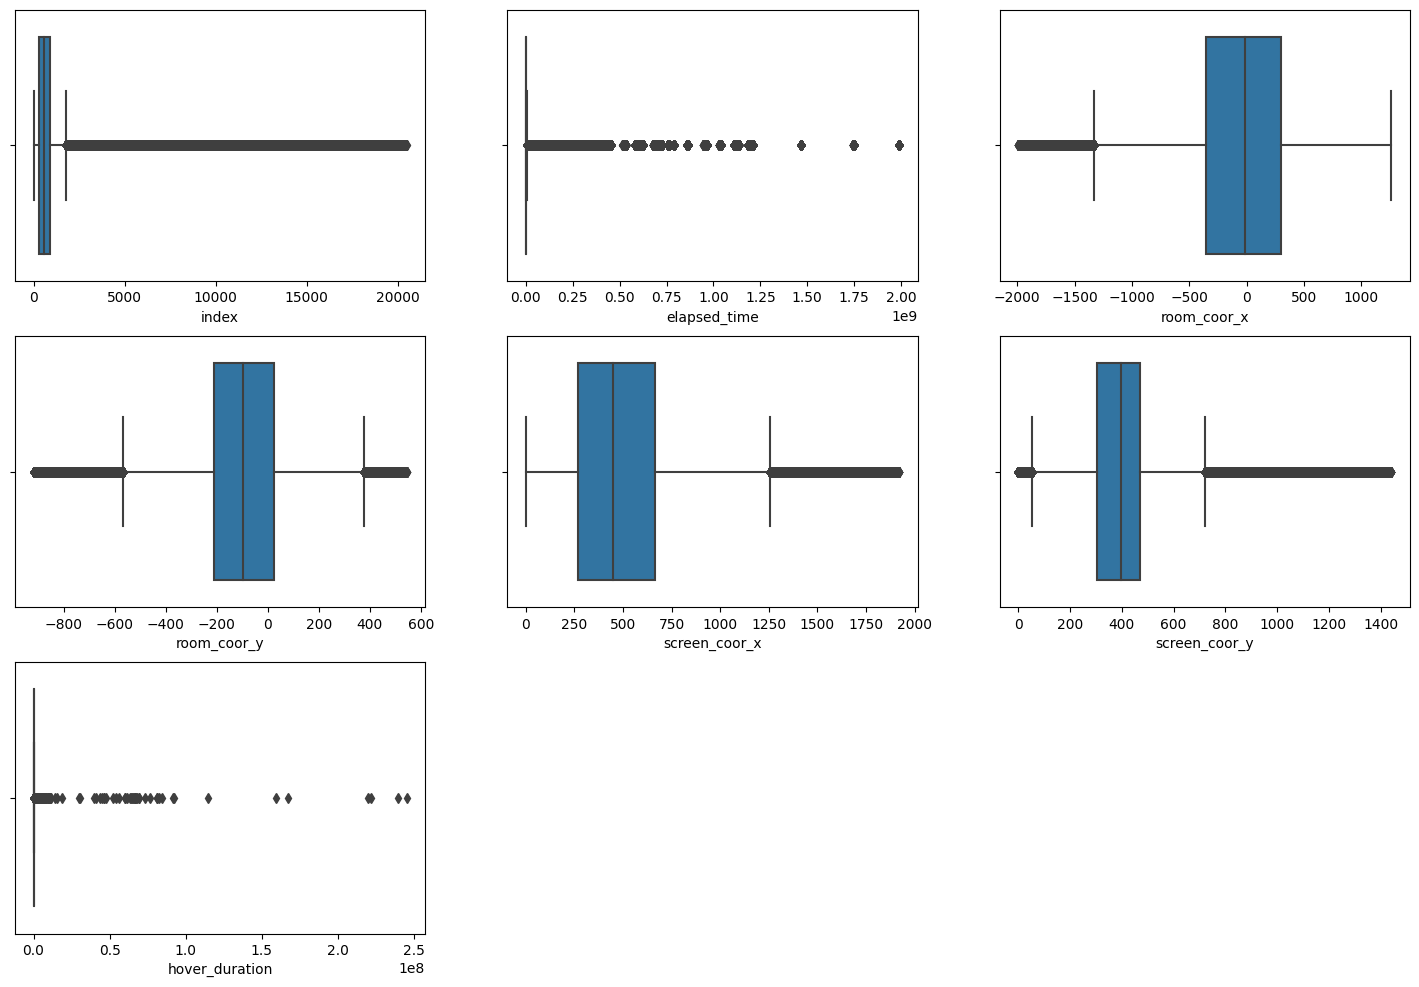

In [28]:
fig, axs = plt.subplots(3, 3, figsize = (18, 12))
row, col = 0, 0
for numerical_col in numerical_cols.drop(['session_id']):
  sns.boxplot(data = raw_train_df, x = numerical_col, ax = axs[row, col])
  col += 1
  if col >= 3:
    col = 0
    row += 1
fig.delaxes(axs[2, 1])
fig.delaxes(axs[2, 2])
plt.show()

**Nhận xét:** Quan sát các biểu đồ trên, ta nhận thấy:
- Hầu hết các cột của dữ liệu đều có xuất hiện outlier, một số cột có xuất hiện khá nhiều outlier như "index", "elapsed_time", "hover_duration" thì dữ liệu đều có xu hướng nghiêng nhiều về bên phải. Lấy ví dụ cột "elapsed_time" và cột "hover_duration" cho ta biết được đa phần người học không mất nhiều thời gian cho các sự kiện hover hoặc các sự kiện khác, dễ thấy phần lớn dữ liệu tập trung nhiều ở phía bên trái biểu đồ.
- Cột "room_coor_x" có xuất hiện nhiều outlier ở phía bên trái cho thấy sự tương tác với các sự kiện click vào room trong trò chơi thường không xảy ra nhiều ở phía bên trái màn hình room. Tương tự với cột "room_coor_y" có xuất hiện outlier ở cả phía bên trái và bên phải, điều này cho thấy các sự kiện click vào room trong trò chơi thường không xảy ra nhiều ở phía bên trên và bên dưới màn hình room.
- Cột "screen_coor_x" có xuất hiện nhiều outlier ở phía bên phải cho thấy sự tương tác với các sự kiện click vào màn hình trò chơi thường không xảy ra nhiều ở phía bên phải màn hình. Tương tự với cột "screen_coor_y" có xuất hiện nhiều outlier ở bên phải, điều này cho thấy các sự kiện click vào màn hình trò chơi thường không xảy ra nhiều ở phía bên trên màn hình trò chơi.

Tiếp theo, để làm rõ hơn về mối quan hệ đơn biến của tập dữ liệu, ta sẽ dùng các biểu đồ histogram đối với các cột dạng số để biết được sự phân phối của dữ liệu. Với mỗi biểu đồ histogram ta cũng cần tính độ lệch (Skewness) tương ứng. Trong đó:
- Nếu độ lệch của đặc trưng đó có giá trị âm chứng tỏ phân phối dữ liệu của đặc trưng đó bị lệch trái.
- Nếu độ lệch của đặc trưng đó có giá trị dương chứng tỏ phân phối dữ liệu của đặc trưng đó bị lệch phải.

In [ ]:
# fig, axs = plt.subplots(3, 3, figsize = (18, 9))
# row, col = 0, 0
# for numerical_col in numerical_cols.drop(['session_id']):
#   skewness = raw_train_df[numerical_col].skew()
#   sns.histplot(data = raw_train_df, x = numerical_col, bins = 10, kde = True, ax = axs[row, col])
#   axs[row, col].legend(labels = [], title = 'Skewness: %.2f'%(skewness))
#   axs[row, col].grid()
#   col += 1
#   if col >= 3:
#     col = 0
#     row += 1
# fig.delaxes(axs[2, 1])
# fig.delaxes(axs[2, 2])
# plt.show()

### Người học sử dụng thời gian như thế nào theo từng nhóm level?

Để trả lời cho câu hỏi này, ta sẽ dùng biểu đồ đường để thể hiện khoảng thời gian dùng cho việc học của một học sinh theo từng nhóm level, tuy nhiên ta chỉ xét trong trường hợp session đầu tiên. Trong đó:
- Trục tung: khoảng thời gian đã trôi qua (tính bằng ms) giữa thời điểm bắt đầu session cho đến khi sự kiện được ghi lại **(elapsed_time)**.
- Trục hoành: index của các sự kiện trong cùng một session **(index)**.

Các màu sắc thể hiện cho từng nhóm level **(level_group)**. Trong đó:
- Màu xanh dương: từ level 0 đến level 4 (0-4).
- Màu cam: từ level 5 đến level 12 (5-12).
- Màu xanh lá: từ level 13 đến level 22 (13-22).

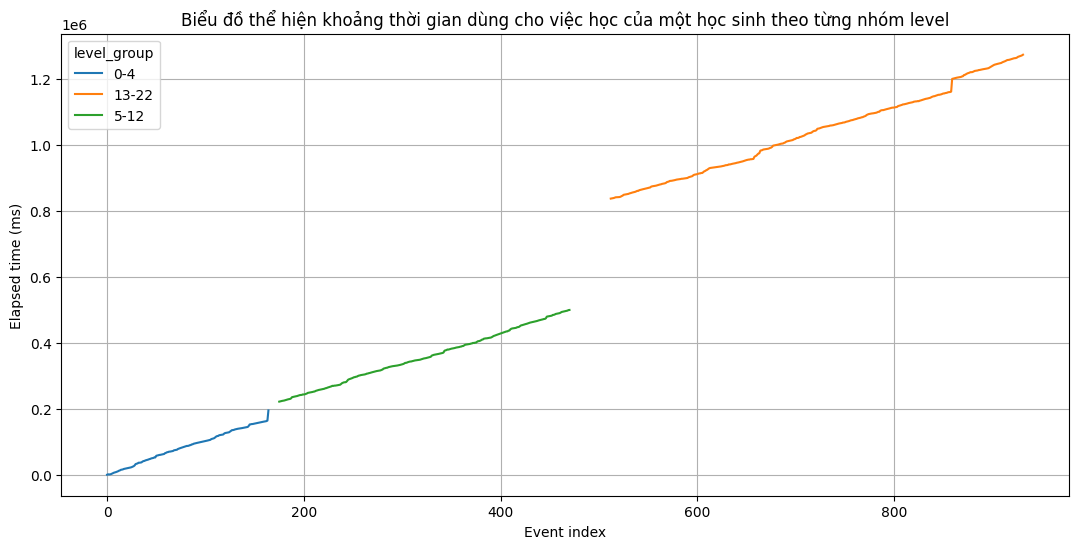

In [36]:
first_df = raw_train_df[raw_train_df['session_id'] == 20090312431273200]
plt.figure(figsize = (13, 6))
sns.lineplot(data = first_df, x = 'index', y = 'elapsed_time', hue = 'level_group')
plt.grid()
plt.xlabel('Event index')
plt.ylabel('Elapsed time (ms)')
plt.title('Biểu đồ thể hiện khoảng thời gian dùng cho việc học của một học sinh theo từng nhóm level')
plt.show()

**Nhận xét:** Quan sát biểu đồ trên cho thấy khoảng thời gian dùng cho việc học tăng lên theo từng level. Đặc biệt, ở phần chuyển tiếp giữa nhóm level thứ 2 (5-12) và nhóm level thứ 3 (13-22), khoảng cách về thời gian cao hơn so với nhóm level thứ 1 (0-4). Điều này có liên quan đến thời gian được sử dụng để trả lời các câu hỏi giữa mỗi phần, cụ thể các câu hỏi ở giữa nhóm level thứ 1 (0-4) và nhóm level thứ 2 (5-12) có phần dễ hơn nên người chơi thường sẽ không mất nhiều thời gian. Trong khi đó các câu hỏi ở giữa nhóm level thứ 2 (5-12) và nhóm level thứ 3 (13-22) có thể sẽ gây khó dễ cho người chơi nhiều hơn nên sẽ mất nhiều thời gian hơn.

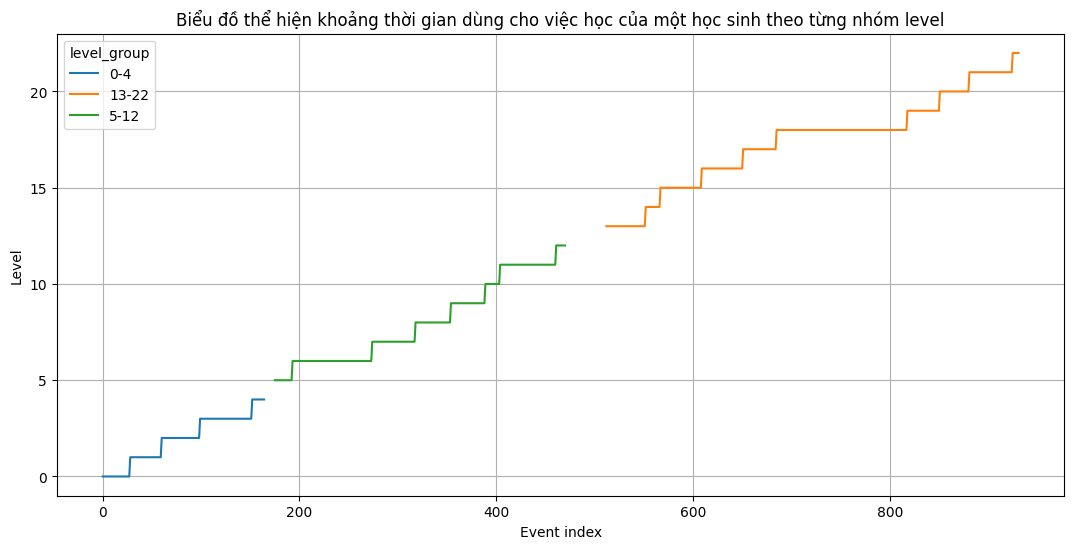

In [37]:
plt.figure(figsize = (13, 6))
sns.lineplot(data = first_df, x = 'index', y = 'level', hue = 'level_group')
plt.grid()
plt.ylim(min(first_df['level']) - 1, max(first_df['level']) + 1)
plt.xlabel('Event index')
plt.ylabel('Level')
plt.title('Biểu đồ thể hiện khoảng thời gian dùng cho việc học của một học sinh theo từng nhóm level')
plt.show()

In [ ]:
# fig, axs = plt.subplots(3, 4, figsize = (24, 12))
# row, col = 0, 0
# for event_name in categorical_col_df['unique']['event_name']:
#   event_df = df[df['event_name'] == event_name]
#   sns.histplot(data = event_df, x = 'elapsed_time', hue = 'level_group', binrange = (0, event_df['elapsed_time'].max()), ax = axs[row, col])
#   axs[row, col].set_xlabel(None)
#   axs[row, col].set_ylabel(None)
#   axs[row, col].set_title(event_name, fontsize = 10)
#   col += 1
#   if col >= 4:
#     col = 0
#     row += 1
# fig.delaxes(axs[2, 3])
# plt.show()

### Cách điều khiển trong trò chơi có thuận tiện đối với học sinh hay không?

Để trả lời cho câu hỏi này, ta sẽ dùng biểu đồ scatter để thể hiện các lần click vào room trong trò chơi của một học sinh theo từng nhóm level, tuy nhiên ta chỉ xét trong trường hợp session đầu tiên. Trong đó:
- Trục tung: tọa độ y của lần click vào room trong trò chơi (chỉ dành cho các sự kiện click) **(room_coor_y)**.
- Trục hoành: tọa độ x của lần click vào room trong trò chơi (chỉ dành cho các sự kiện click) **(room_coor_x)**.

Các màu sắc thể hiện cho từng nhóm level **(level_group)**. Trong đó:
- Màu xanh dương: từ level 0 đến level 4 (0-4).
- Màu cam: từ level 5 đến level 12 (5-12).
- Màu xanh lá: từ level 13 đến level 22 (13-22).

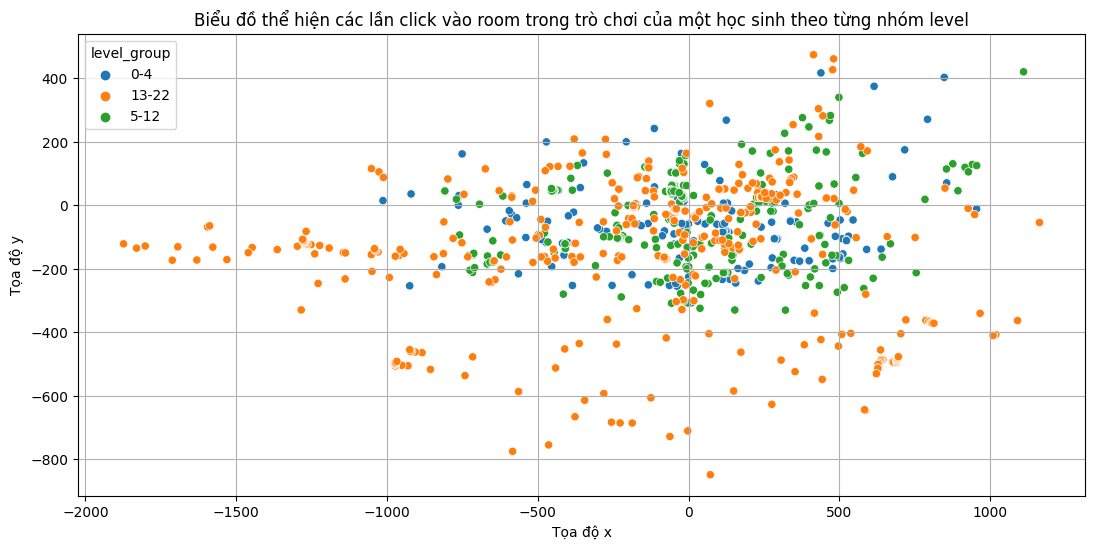

In [38]:
plt.figure(figsize = (13, 6))
sns.scatterplot(data = first_df, x = 'room_coor_x', y = 'room_coor_y', hue = 'level_group')
plt.grid()
plt.xlabel('Tọa độ x')
plt.ylabel('Tọa độ y')
plt.title('Biểu đồ thể hiện các lần click vào room trong trò chơi của một học sinh theo từng nhóm level')
plt.show()

**Nhận xét:** Quan sát biểu đồ trên cho thấy các lần click vào room trong trò chơi ở các nhóm level thứ 1 (0-4) và nhóm level thứ 2 (5-12) phân bố tập trung ở trung tâm màn hình hơn. Trong khi đó ở nhóm level thứ 3 (13-22), các lần click này lại tập trung nhiều vào ở phần dưới và phần bên trái màn hình hơn. Điều này có thể do mức độ khó của trò chơi ở 2 nhóm level ban đầu tập trung vào việc làm quen dần với cách điều khiển trò chơi nên phân bố các room ở 2 nhóm level ban đầu thường sẽ dễ phát hiện hơn. Trong khi đó ở nhóm level thứ 3 (13-22) thì độ khó của trò chơi được nâng lên vào có một số room được ẩn giấu để người chơi khó phát hiện, do vậy việc phân bố room ở phần dưới và phần bên trái màn hình trò chơi cũng là điều dễ hiểu.

Ta sẽ dùng thêm biểu đồ scatter để thể hiện các lần click vào màn hình trò chơi của một học sinh theo từng nhóm level, tuy nhiên ta chỉ xét trong trường hợp session đầu tiên. Trong đó:
- Trục tung: tọa độ y của lần click liên quan đến màn hình của người chơi (chỉ dành cho các sự kiện click) **(screen_coor_y)**.
- Trục hoành: tọa độ x của lần click liên quan đến màn hình của người chơi (chỉ dành cho các sự kiện click) **(screen_coor_x)**.

Các màu sắc thể hiện cho từng nhóm level **(level_group)**. Trong đó:
- Màu xanh dương: từ level 0 đến level 4 (0-4).
- Màu cam: từ level 5 đến level 12 (5-12).
- Màu xanh lá: từ level 13 đến level 22 (13-22).

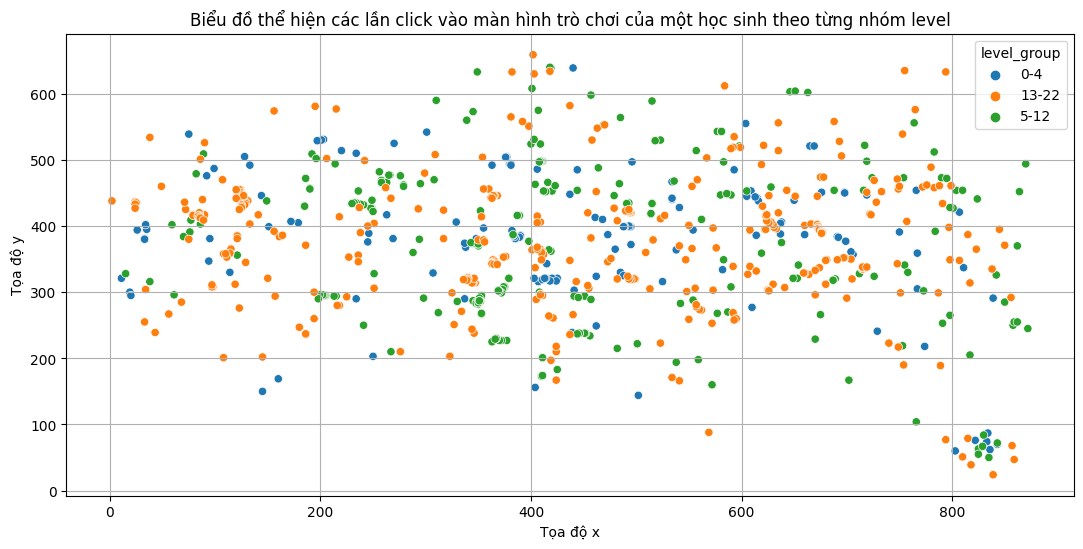

In [39]:
plt.figure(figsize = (13, 6))
sns.scatterplot(data = first_df, x = 'screen_coor_x', y = 'screen_coor_y', hue = 'level_group')
plt.grid()
plt.xlabel('Tọa độ x')
plt.ylabel('Tọa độ y')
plt.title('Biểu đồ thể hiện các lần click vào màn hình trò chơi của một học sinh theo từng nhóm level')
plt.show()

**Nhận xét:** Quan sát biểu đồ trên cho thấy kích thước màn hình trò chơi chỉ có thể đạt tối đa **1919x1440**, các lần click vào màn hình trò chơi phân bố rải rác khắp nơi. Đồng thời có một số lượng nhỏ các lần click tập trung ở phía dưới bên phải màn hình, điều này cho thấy đây là vị trí của các nút bấm qua màn.

Ngoài ra, quan sát cả 2 biểu đồ trên ta thấy kích thước màn hình room có chứa giá trị âm còn kích thước màn hình trò chơi thì không, điều này có thể là do kích thước của màn hình trò chơi là cố định nên ta sẽ lấy tọa độ gốc của màn hình (có tọa độ x = 0 và y = 0) ở **góc dưới cùng bên trái** màn hình, còn kích thước của màn hình room luôn thay đổi khác nhau đối với các địa điểm khác nhau nên ta sẽ lấy tọa độ gốc của màn hình (có tọa độ x = 0 và y = 0) ở **chính giữa trung tâm** màn hình.

### Title

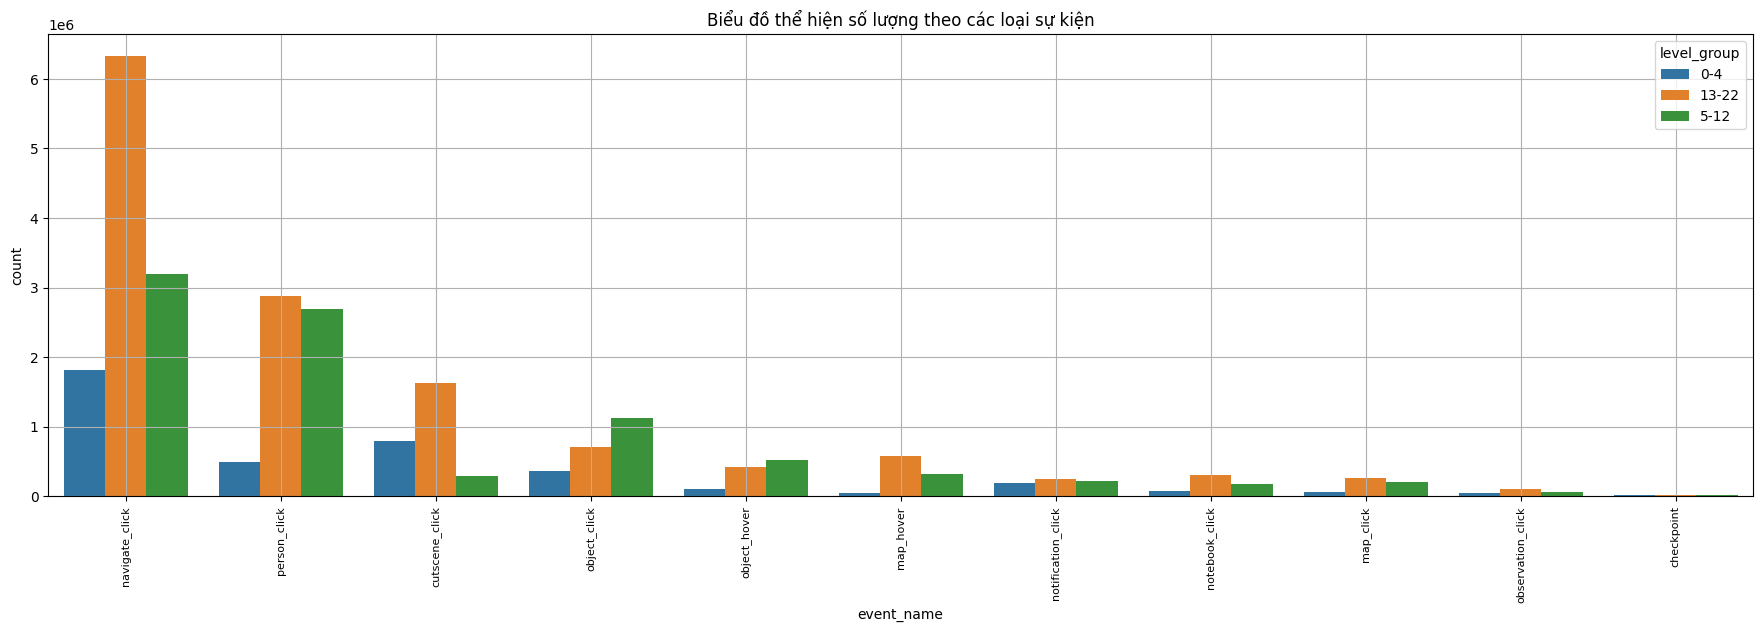

In [40]:
fig, ax = plt.subplots(figsize = (22, 6))
sns.countplot(data = raw_train_df, x = 'event_name', hue = 'level_group', order = raw_train_df['event_name'].value_counts().index, ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)
plt.grid()
plt.title('Biểu đồ thể hiện số lượng theo các loại sự kiện')
plt.show()

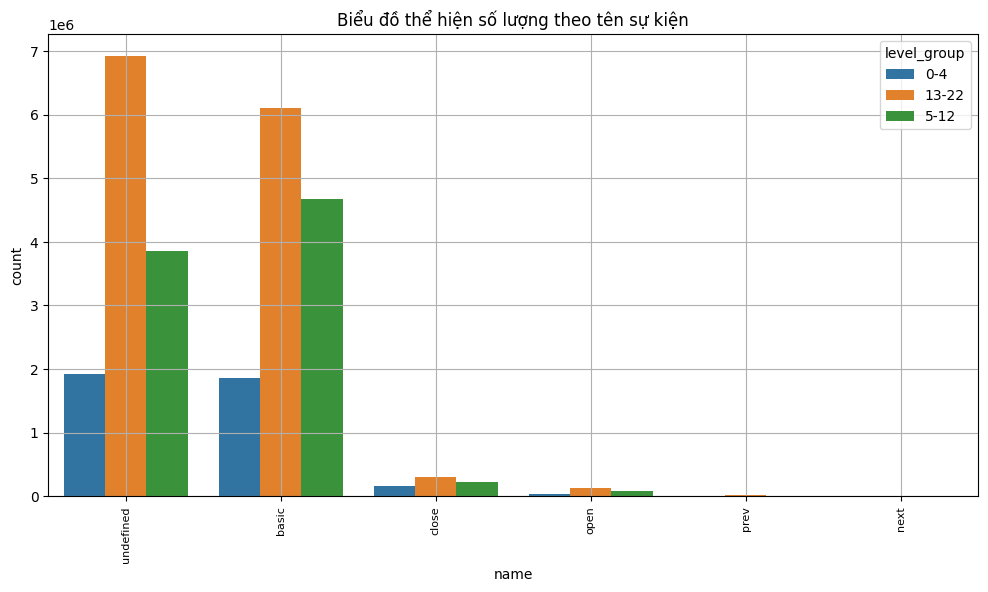

In [41]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.countplot(data = raw_train_df, x = 'name', hue = 'level_group', order = raw_train_df['name'].value_counts().index, ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)
plt.grid()
plt.title('Biểu đồ thể hiện số lượng theo tên sự kiện')
plt.show()

https://www.kaggle.com/code/ziaulkarim/eda-pyspark-faster-all-cols

https://www.kaggle.com/code/mojtylor/exploration-game-play